In [12]:
import numpy as np
import pandas as pd

In [13]:
#загрузка данных
data = pd.read_csv('SalaryC.csv')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
print(data.isnull().sum()) #проверка пустых записей

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


In [15]:
duplicates = data.duplicated()
print(f"Найдено {duplicates.sum()} дубликата")

Найдено 24 дубликата


In [37]:
data = data.drop_duplicates()
duplicates = data.duplicated()
print(f"Количество дубликатов после удаления: {duplicates.sum()}")

Количество дубликатов после удаления: 0


In [17]:
#кодирование категориальных признаков
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
data['workclass'] = label_encoder.fit_transform(data['workclass'])
data['education'] = label_encoder.fit_transform(data['education'])
data['marital-status'] = label_encoder.fit_transform(data['marital-status'])
data['occupation'] = label_encoder.fit_transform(data['occupation'])
data['relationship'] = label_encoder.fit_transform(data['relationship'])
data['race'] = label_encoder.fit_transform(data['race'])
data['sex'] = label_encoder.fit_transform(data['sex'])
data['native-country'] = label_encoder.fit_transform(data['native-country'])
data['salary'] = label_encoder.fit_transform(data['salary'])

data.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
count,32537.000000,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,3.868734,1.897808e+05,10.297507,10.081815,2.611427,6.572856,1.446538,3.665827,0.669238,1078.443741,87.368227,40.440329,36.721579,0.240926
std,13.637984,1.456445,1.055565e+05,3.870142,2.571633,1.506301,4.229521,1.607064,0.848847,0.470495,7387.957424,403.101833,12.346889,7.820732,0.427652
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.369930e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [18]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


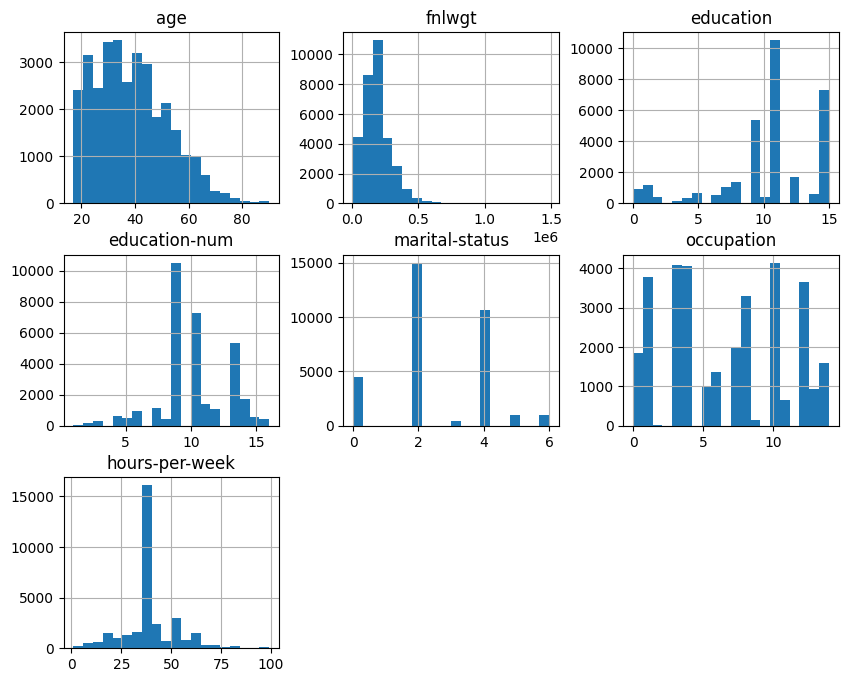

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

#визуализация признаков
num_features = ['age', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'hours-per-week']
data[num_features].hist(bins=20, figsize=(10,8))
plt.show()

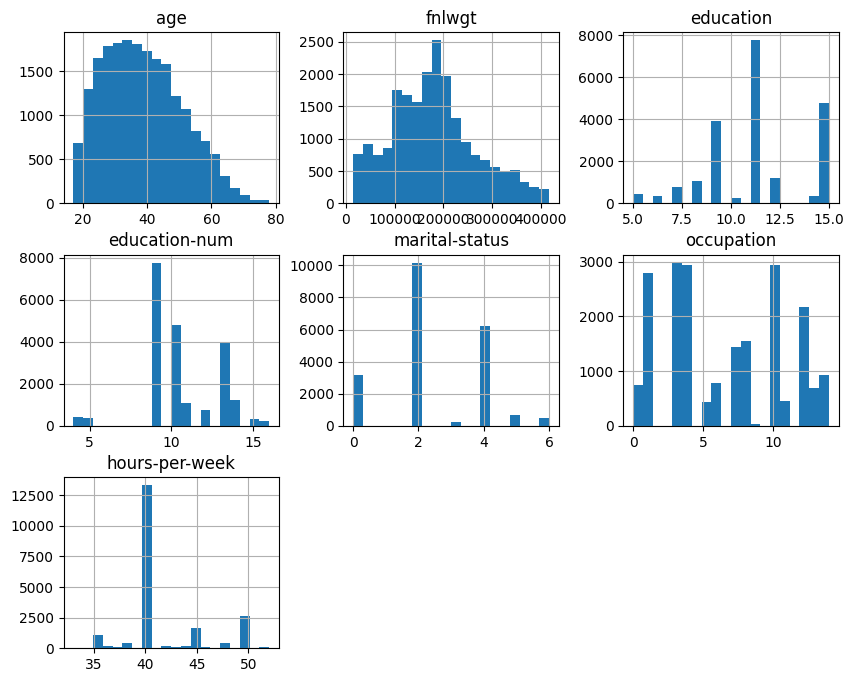

In [20]:
#избавляемся от выбросов
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

data = remove_outliers(data, num_features)

data[num_features].hist(bins=20, figsize=(10,8))
plt.show()

In [21]:
#масштабирование числовых признаков
scaler = StandardScaler()
data[num_features] = scaler.fit_transform(data[num_features])

In [22]:
print(data.describe())

                age     workclass        fnlwgt     education  education-num  \
count  2.089600e+04  20896.000000  2.089600e+04  2.089600e+04   2.089600e+04   
mean   1.026914e-16      3.887634 -3.553394e-17  2.278252e-16  -4.063450e-16   
std    1.000024e+00      1.369936  1.000024e+00  1.000024e+00   1.000024e+00   
min   -1.818271e+00      0.000000 -1.903536e+00 -2.345124e+00  -2.915357e+00   
25%   -8.201643e-01      4.000000 -7.252175e-01 -8.149772e-01  -6.700802e-01   
50%   -7.158446e-02      4.000000 -4.459618e-02 -4.990404e-02  -2.210248e-01   
75%    6.769953e-01      4.000000  5.500667e-01  3.326326e-01   1.126141e+00   
max    3.255437e+00      8.000000  2.719487e+00  1.480242e+00   2.473307e+00   

       marital-status    occupation  relationship          race           sex  \
count    2.089600e+04  2.089600e+04  20896.000000  20896.000000  20896.000000   
mean     1.652583e-16  9.215021e-17      1.358490      3.662998      0.682906   
std      1.000024e+00  1.000024e+00 

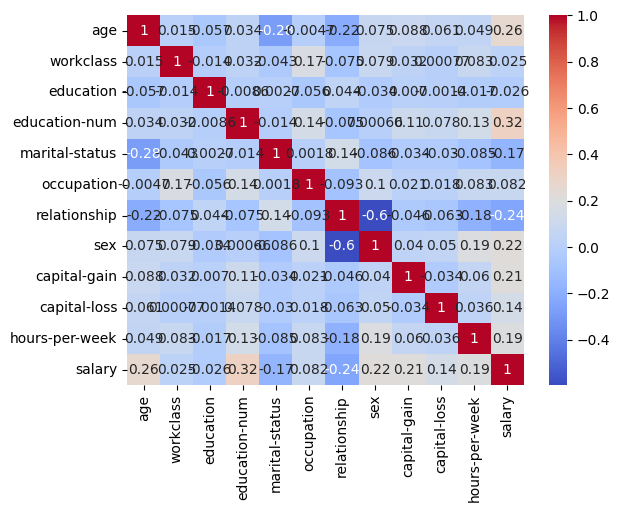

In [23]:
#матрица корреляции
data_corr = data.drop(['fnlwgt', 'race', 'native-country'], axis=1)

corr_matrix = data_corr.corr() 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

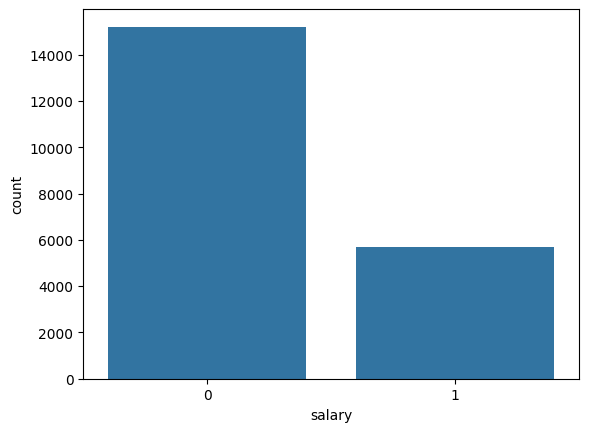

salary
0    15205
1     5691
Name: count, dtype: int64


In [24]:
sns.countplot(x='salary', data=data) #анализ целевой переменной
plt.show()
print(data['salary'].value_counts())

In [25]:
#отбор признаков и масштабирование
X = data.drop(['salary'], axis=1)
y = data['salary']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
culminative_variance = explained_variance.cumsum()

n_components = (culminative_variance <= 0.95).sum() + 1
print(f'Число выбранных компонент: {n_components}')

Число выбранных компонент: 13


In [27]:
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [29]:
!pip install imblearn

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42) #разделение данных

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

#оценка базовой модели
base_model = LogisticRegression()
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1: {f1_score(y_test, y_pred):.4f}")

Accuracy: 0.7581
F1: 0.6201


In [31]:
params_lr_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
lr = LogisticRegression(solver='liblinear')
grid_lr = GridSearchCV(lr, params_lr_grid, cv=5)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']})

In [32]:
params_rf_grid = {'n_estimators': [50, 100], 'max_depth': [5, 10]}
rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, params_rf_grid, cv=5)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10], 'n_estimators': [50, 100]})

In [33]:
params_xgb_grid = {'n_estimators': [50, 100], 'learning_rate': [0.1, 0.01]}
xgb = XGBClassifier()
grid_xgb = GridSearchCV(xgb, params_xgb_grid, cv=5)
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.01],
                         'n_estimators': [50, 100]})

In [34]:
models = {'Logistic Regression': grid_lr.best_estimator_, 'Random Forest': grid_rf.best_estimator_, 'XGBoost': grid_xgb.best_estimator_}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'{name}:')
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1: {f1_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}\n")

Logistic Regression:
Accuracy: 0.7553
F1: 0.6170
Precision: 0.5242

Random Forest:
Accuracy: 0.7844
F1: 0.6570
Precision: 0.5648

XGBoost:
Accuracy: 0.7935
F1: 0.6735
Precision: 0.5764



In [35]:
import joblib

joblib.dump(grid_xgb.best_estimator_, 'best_xgb_model.pkl')

['best_xgb_model.pkl']

In [36]:
loded_model = joblib.load('best_xgb_model.pkl')
sample = X_pca[0:1]
print(f'Предсказание: {loded_model.predict(sample)}')

Предсказание: [0]
